<a href="https://colab.research.google.com/github/alexDx12/gb_statistics/blob/lesson_8/lesson_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Теория вероятностей и математическая статистика

## Урок 7

## Дисперсионный анализ. Метод главных компонент. Логистическая регрессия

### Домашнее задание

### Задача 1

__Постановка задачи__

Используя данные о хоккеистах, проверьте, является ли среди хоккеистов из Финляндии, Норвегии и Дании значимым отличие: а) роста, б) BMI.

__Решение__

Импорт библиотек и скриптов:

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

Настройки:

In [ ]:
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

Создание вспомогательных структур:

In [ ]:
def anova(*ys: np.ndarray) -> float:
    """Функция возвращает значение F-статистики
    для дисперсионного анализа.
    """
    
    y = np.concatenate(ys)

    ss_b = sum((yi.mean() - y.mean()) ** 2 * yi.size for yi in ys)
    ss_w = sum(((yi - yi.mean()) ** 2).sum() for yi in ys)
    
    sigma_b = ss_b / (len(ys) - 1)
    sigma_w = ss_w / (y.size - len(ys))
    
    return sigma_b / sigma_w

Загрузка и первичный обзор датасета:

In [ ]:
df = pd.read_csv('./hockey_players.csv', encoding = 'ISO-8859-1')
df.head(2)

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277


In [ ]:
df['country'].unique()

array(['RUS', 'AUT', 'BLR', 'CAN', 'CZE', 'FIN', 'GER', 'ITA', 'JPN',
       'LAT', 'NOR', 'SUI', 'SVK', 'SWE', 'UKR', 'USA', 'POL', 'SLO',
       'DEN', 'FRA', 'KAZ', 'HUN'], dtype=object)

Список наименований целевых стран (countries):

In [ ]:
countries = ['FIN', 'NOR', 'DEN']

Выборки роста хоккеистов целевых стран (ys):

In [ ]:
ys = [df.loc[df['country'] == country, 'height'] for country in countries]
ys

[120     184
 121     178
 122     178
 123     185
 124     192
        ... 
 6038    189
 6039    192
 6040    179
 6041    200
 6042    187
 Name: height, Length: 396, dtype: int64,
 237     179
 238     178
 239     183
 240     179
 241     183
        ... 
 6188    179
 6189    186
 6190    185
 6191    190
 6192    180
 Name: height, Length: 290, dtype: int64,
 878     184
 879     192
 880     184
 881     188
 882     180
        ... 
 6013    185
 6014    180
 6015    188
 6016    186
 6017    176
 Name: height, Length: 340, dtype: int64]

Статистика роста хоккеистов целевых стран (F):

In [ ]:
F = anova(*ys)
F

4.273207343917213

Параметры для определения оценок дисперсий (k1, k2):

In [ ]:
k = len(countries)
n = sum(y.size for y in ys)
k1 = k - 1
k2 = n - k
k1, k2

(2, 1023)

Квантиль распределения Фишера (t):

In [ ]:
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)
t

3.0045220661840073

Визуализация критической области:

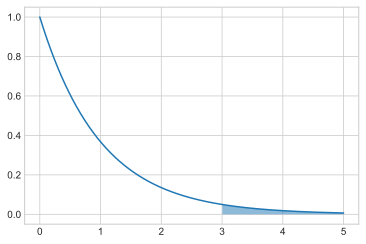

In [ ]:
ox = np.linspace(0, 5, 500)
oy = stats.f.pdf(ox, k1, k2)
ox_right = np.linspace(t, 5, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)
plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

Поскольку статистика (F) попадает в критическую область, поэтом делается заключение о том, что между ростом хоккеистов выбранных стран есть значимое отличие.

Аналогично для BMI. Пересчитать нужно только статистику (F), поскольку остальные параметры такие же, как раньше.

Статистика BMI хоккеистов целевых стран (F):

In [ ]:
ys = [df.loc[df['country'] == country, 'bmi'] for country in countries]
F = anova(*ys)
F

36.05816727743814

Поскольку статистика (F) попадает в критическую область, поэтом делается заключение о том, что между BMI хоккеистов выбранных стран есть значимое отличие.

Ответ: а) является; б) является.